In [ ]:
from bbq.field import Field
from bbq.polynomial import Monomial
from bbq.bbq_code import BivariateBicycle
from bbq.parameters import bp_distance
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
field = Field(3)
x, y = Monomial(field, 'x'), Monomial(field, 'y')
a = 1 - x
b = 1 - y

bb = BivariateBicycle(a, b, 3, 3, 1)


In [ ]:
k = len(bb.x_logicals)
print(f'k = {k}')


k = 2


In [ ]:
dx = bp_distance(field, bb.hx, bb.x_logicals)
dz = bp_distance(field, bb.hz, bb.z_logicals)
d = min(dx, dz)

print(f'dx = {dx}, dz = {dz}, d = {d}')


dx = 3, dz = 3, d = 3


In [ ]:
def make_str(a_polys, b_polys):
    poly_str = []
    for i in range(len(a_polys)):
        poly_str.append(f'{a_polys[i]}, {b_polys[i]}')
    return poly_str


In [ ]:
def make_labels(AB, K):
    labels = ['' for _ in range(len(AB))]
    ind = np.nonzero(K)[0]
    if len(ind) == len(AB):
        print("All codes have non-zero k, showing all labels")
        labels = AB.copy()
    else:
        for i in ind:
            labels[i] = AB[i]
            print(AB[i])
    return labels


In [ ]:
def plot_bars(A, B, K, D, title):
    AB = make_str(A, B)

    w, x = 0.4, np.arange(len(AB))

    fig, ax = plt.subplots()
    ax.bar(x - w/2, K, width=w, label='logicals, k', color='slateblue')
    ax.bar(x + w/2, D, width=w, label='distance, d', color='lightseagreen')

    labels = make_labels(AB, K)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=75)
    ax.figure.set_size_inches(10, 5)
    ax.set_title(title)
    ax.legend()

    plt.show();


In [175]:
# Search over Toric GF(5)

field = Field(3)
x, y = Monomial(field, 'x'), Monomial(field, 'y')

A, B = [], []
K = []
DX, DZ, D = [], [], []

for a1 in range(1, field.p):
    for a2 in range(1, field.p):
        for b1 in range(1, field.p):
            for b2 in range(1, field.p):
                a = a1 + a2*x
                b = b1 + b2*y

                bb = BivariateBicycle(a, b, 12, 12, 1)

                k = len(bb.x_logicals)

                if k == 0:
                    dx = dz = d = 0
                else:
                    dx = bp_distance(field, bb.hx, bb.x_logicals)
                    dz = bp_distance(field, bb.hz, bb.z_logicals)
                    d = min(dx, dz)

                A.append(a)
                B.append(b)
                K.append(k)
                DX.append(dx)
                DZ.append(dz)
                D.append(d)


/Users/eleanorkneip/Documents/phd/bbq-project/bbqudit/bbq/decoder.py:120: RuntimeWarning: invalid value encountered in divide
  sub_convolutions = sub_convolutions / convolution


All codes have non-zero k, showing all labels


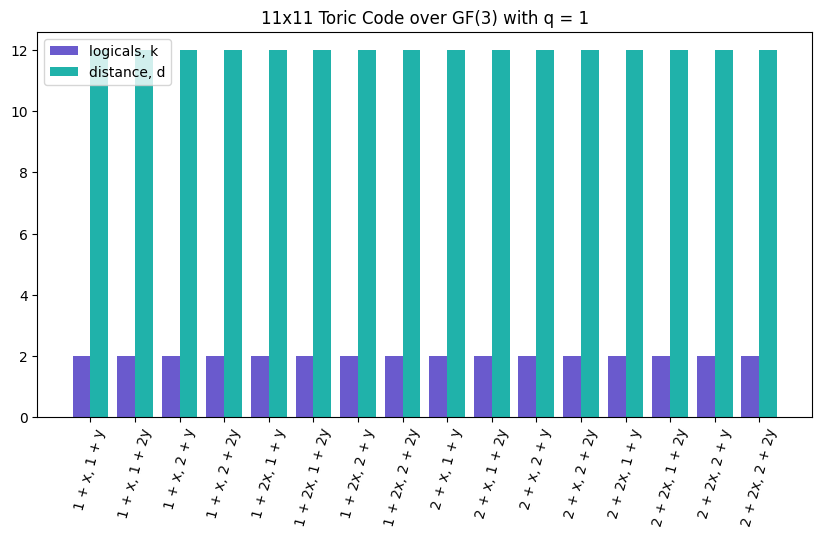

In [ ]:
plot_bars(A, B, K, D, '11x11 Toric Code over GF(3) with q = 1')
